## L6.Jakub_Szczypek

## Wczytanie potrzebnych bibliotek

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from pathlib import Path
import psycopg2 as pg

**Wczytanie danych z oryginalnego pliku 13_WARMIN╠üSKO-MAZURSKIE.csv i wyświetlenie informacji o danych:**

In [2]:
WARMIŃSKO_MAZURSKIE = pd.read_csv('../OriginalData/13_WARMIN╠üSKO-MAZURSKIE.csv')

print("Podstawowe informacje o bazie: \n")
WARMIŃSKO_MAZURSKIE.info()

Podstawowe informacje o bazie: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       530 non-null    int64  
 1   Dni od zakupu    530 non-null    int64  
 2   Marka            530 non-null    object 
 3   Wiek kupującego  463 non-null    float64
 4   Płeć kupującego  530 non-null    object 
 5   Ocena            530 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 25.0+ KB


**Wyświetlenie oryginalnej bazy danych:**

In [3]:
print("\nOryginalna baza danych:")
pd.set_option('display.max_rows', None)
WARMIŃSKO_MAZURSKIE


Oryginalna baza danych:


,Unnamed: 0,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,0,5,Dyson,45.0,K,2.0
1,1,9,Dyson,NaN,K,1.0
2,2,11,Beko,44.0,K,2.0
3,3,10,Electrolux,40.0,bd.,2.0
4,4,5,Electrolux,62.0,K,2.5
5,5,3,Samsung,39.0,bd.,4.0
6,6,9,Samsung,NaN,M,2.0
7,7,9,Beko,44.0,bd.,1.0
8,8,7,Tefal,39.0,K,2.5
9,9,8,Beko,39.0,K,2.5


## Metadata

In [4]:
print("Indeksy w całym zbiorze danych:")
print(WARMIŃSKO_MAZURSKIE.index[0], " - ",  WARMIŃSKO_MAZURSKIE.index[-1])

print("\n")
print("Dni od zakupu:")
print(WARMIŃSKO_MAZURSKIE["Dni od zakupu"].min(), " - ", WARMIŃSKO_MAZURSKIE["Dni od zakupu"].max())

print("\n")
print("Występujące marki:")
for marka in WARMIŃSKO_MAZURSKIE["Marka"].unique():
    print("{}".format(marka))


print("\n")
print("Wiek kupujących:")
print(WARMIŃSKO_MAZURSKIE["Wiek kupującego"].min(), " - ", WARMIŃSKO_MAZURSKIE["Wiek kupującego"].max())
print("( w tym {} wartości NaN )".format(WARMIŃSKO_MAZURSKIE["Wiek kupującego"].isna().sum()))

print("\n")
print("Płeć kupującego:")
for plec in WARMIŃSKO_MAZURSKIE["Płeć kupującego"].unique():
    print("{}".format(plec))


print("\n")
print("Oceny kupujących:")
print(WARMIŃSKO_MAZURSKIE["Ocena"].min(), " - ", WARMIŃSKO_MAZURSKIE["Ocena"].max())

Indeksy w całym zbiorze danych:
0  -  529


Dni od zakupu:
1  -  17


Występujące marki:
Dyson
Beko
Electrolux
Samsung
Tefal


Wiek kupujących:
18.0  -  68.0
( w tym 67 wartości NaN )


Płeć kupującego:
K
bd.
M


Oceny kupujących:
0.0  -  5.0


## Modyfikacja danych

Usunąłem wszystkich kupujących których data urodzenia to "NaN", bądź płeć to "bd."

In [5]:
WARMIŃSKO_MAZURSKIE_BEZ_NAN = WARMIŃSKO_MAZURSKIE.dropna()
WARMIŃSKO_MAZURSKIE_BEZ_bd = WARMIŃSKO_MAZURSKIE_BEZ_NAN.loc[WARMIŃSKO_MAZURSKIE_BEZ_NAN['Płeć kupującego'] != 'bd.']

#Zapis zmodyfikowanych danych do pliku WARMIŃSKO_MAZURSKIE_BEZ_bd
filepath = Path('../AnalysisData/WARMIŃSKO_MAZURSKIE_BEZ_bd.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)
WARMIŃSKO_MAZURSKIE_BEZ_bd.to_csv(filepath)

# Wczytanie nowych danych
WARMIŃSKO_MAZURSKIE_NEW = pd.read_csv('../AnalysisData/WARMIŃSKO_MAZURSKIE_BEZ_bd.csv')

print("\nUsunięto ze zbioru {} klientów.".format(WARMIŃSKO_MAZURSKIE.index[-1] - WARMIŃSKO_MAZURSKIE_NEW.index[-1]))


Usunięto ze zbioru 203 klientów.


## Data appendix

In [6]:
WARMIŃSKO_MAZURSKIE_NEW.drop(columns=['Unnamed: 0'], inplace=True)

print("Podstawowe informacje o bazie:")
WARMIŃSKO_MAZURSKIE_NEW.info()

Podstawowe informacje o bazie:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     327 non-null    int64  
 1   Dni od zakupu    327 non-null    int64  
 2   Marka            327 non-null    object 
 3   Wiek kupującego  327 non-null    float64
 4   Płeć kupującego  327 non-null    object 
 5   Ocena            327 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 15.5+ KB


In [7]:
print("Indeksy w całym zbiorze danych:")
print(WARMIŃSKO_MAZURSKIE_NEW.index[0], " - ",  WARMIŃSKO_MAZURSKIE_NEW.index[-1])

print("\n")
print("Dni od zakupu:")
print(WARMIŃSKO_MAZURSKIE_NEW["Dni od zakupu"].min(), " - ", WARMIŃSKO_MAZURSKIE_NEW["Dni od zakupu"].max())

print("\n")
print("Występujące marki:")
for marka in WARMIŃSKO_MAZURSKIE_NEW["Marka"].unique():
    print("{}".format(marka))


print("\n")
print("Wiek kupujących:")
print(WARMIŃSKO_MAZURSKIE_NEW["Wiek kupującego"].min(), " - ", WARMIŃSKO_MAZURSKIE_NEW["Wiek kupującego"].max())
print("( w tym {} wartości NaN )".format(WARMIŃSKO_MAZURSKIE_NEW["Wiek kupującego"].isna().sum()))

print("\n")
print("Płeć kupującego:")
for plec in WARMIŃSKO_MAZURSKIE_NEW["Płeć kupującego"].unique():
    print("{}".format(plec))


print("\n")
print("Oceny kupujących:")
print(WARMIŃSKO_MAZURSKIE_NEW["Ocena"].min(), " - ", WARMIŃSKO_MAZURSKIE_NEW["Ocena"].max())

Indeksy w całym zbiorze danych:
0  -  326


Dni od zakupu:
1  -  17


Występujące marki:
Dyson
Beko
Electrolux
Tefal
Samsung


Wiek kupujących:
18.0  -  68.0
( w tym 0 wartości NaN )


Płeć kupującego:
K
M


Oceny kupujących:
0.0  -  5.0


**Jak możemy zauważyć nie mamy już nie zdefioniowanych wierszy w naszych danych**

**Dni od zakupu**

Pierwsza kolumna tabeli, zawierająca informacje o tym ile dni upłynęło od zakupu sprzętu do wystawienia oceny.

| Nazwa oryginalna | Plik oryginalny | Typ danych | Jednostka miary | Prawidłowe wartości | Brakujące wartości | Wszystkie wartości |
| --- | --- | --- | --- | --- | --- | --- |
| "Dni od zakupu" | "13_WARMIN╠üSKO-MAZURSKIE.csv" | int64 | dni | 327 | 203 | 530 |

count    327.000000
mean       6.987768
std        2.740265
min        1.000000
25%        5.000000
50%        7.000000
75%        9.000000
max       17.000000
Name: Dni od zakupu, dtype: float64


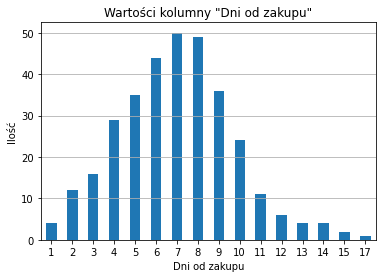

In [8]:
zmienna = "Dni od zakupu"
print(WARMIŃSKO_MAZURSKIE_NEW[zmienna].describe())
WARMIŃSKO_MAZURSKIE_NEW.groupby(zmienna)[zmienna].count().plot.bar()
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.title("Wartości kolumny \"{}\"".format(zmienna))
plt.xlabel(zmienna)
plt.ylabel("Ilość")
plt.show()

**Marka**

Druga kolumna zawiera informacje o marce zakupionego odkurzacza.

| Nazwa oryginalna | Plik oryginalny | Typ danych | Jednostka miary | Prawidłowe wartości | Brakujące wartości | Wszystkie wartości |
| --- | --- | --- | --- | --- | --- | --- |
| "Marka" | "13_WARMIN╠üSKO-MAZURSKIE.csv" | str | - | 327 | 203 | 530 |

count      327
unique       5
top       Beko
freq       101
Name: Marka, dtype: object


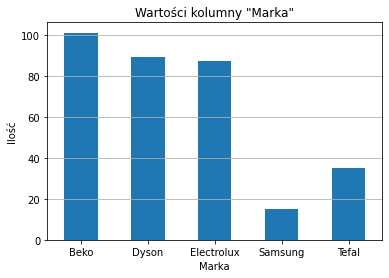

In [9]:
zmienna = "Marka"
print(WARMIŃSKO_MAZURSKIE_NEW[zmienna].describe())
WARMIŃSKO_MAZURSKIE_NEW.groupby(zmienna)[zmienna].count().plot.bar()
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.title("Wartości kolumny \"{}\"".format(zmienna))
plt.xlabel(zmienna)
plt.ylabel("Ilość")
plt.show()

**Wiek kupującego**

Trzecia kolumna zawiera informacje o wieku osoby kupującej odkurzacz.

| Nazwa oryginalna | Plik oryginalny | Typ danych | Jednostka miary | Prawidłowe wartości | Brakujące wartości | Wszystkie wartości |
| --- | --- | --- | --- | --- | --- | --- |
| "Wiek kupującego" | "13_WARMIN╠üSKO-MAZURSKIE.csv" | float64 | lata | 327 | 203 | 530 |

count    327.000000
mean      39.474006
std        9.561158
min       18.000000
25%       34.000000
50%       39.000000
75%       46.000000
max       68.000000
Name: Wiek kupującego, dtype: float64


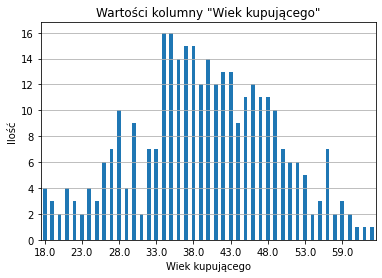

In [22]:
zmienna = "Wiek kupującego"
print(WARMIŃSKO_MAZURSKIE_NEW[zmienna].describe())
WARMIŃSKO_MAZURSKIE_NEW.groupby(zmienna)[zmienna].count().plot.bar()
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.locator_params(nbins=9)
plt.title("Wartości kolumny \"{}\"".format(zmienna))
plt.xlabel(zmienna)
plt.ylabel("Ilość")
plt.show()

**Płeć kupującego**

Czwarta kolumna zawiera informacje na temat płci osoby kupującej odkurzacz.

| Nazwa oryginalna | Plik oryginalny | Typ danych | Jednostka miary | Prawidłowe wartości | Brakujące wartości | Wszystkie wartości |
| --- | --- | --- | --- | --- | --- | --- |
| "Płeć kupującego" | "13_WARMIN╠üSKO-MAZURSKIE.csv" | str | - | 327 | 203 | 530 |

count     327
unique      2
top         K
freq      215
Name: Płeć kupującego, dtype: object


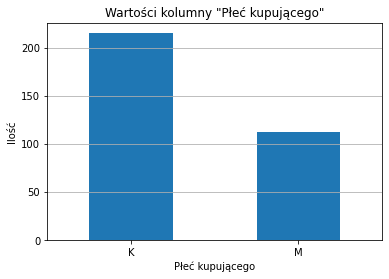

In [11]:
zmienna = "Płeć kupującego"
print(WARMIŃSKO_MAZURSKIE_NEW[zmienna].describe())
WARMIŃSKO_MAZURSKIE_NEW.groupby(zmienna)[zmienna].count().plot.bar()
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.title("Wartości kolumny \"{}\"".format(zmienna))
plt.xlabel(zmienna)
plt.ylabel("Ilość")
plt.show()

**Ocena**

Piąta kolumna zawiera informacje na temat oceny osoby kupującej odkurzacz.

| Nazwa oryginalna | Plik oryginalny | Typ danych | Jednostka miary | Prawidłowe wartości | Brakujące wartości | Wszystkie wartości |
| --- | --- | --- | --- | --- | --- | --- |
| "Ocena" | "13_WARMIN╠üSKO-MAZURSKIE.csv" | str | - | 327 | 203 | 530 |

count    327.000000
mean       2.503058
std        1.071804
min        0.000000
25%        1.500000
50%        2.500000
75%        3.500000
max        5.000000
Name: Ocena, dtype: float64


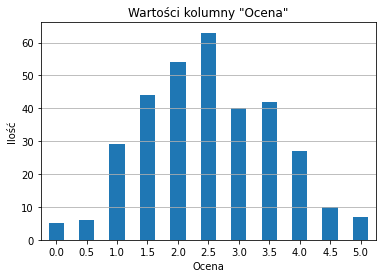

In [13]:
zmienna = "Ocena"
print(WARMIŃSKO_MAZURSKIE_NEW[zmienna].describe())
WARMIŃSKO_MAZURSKIE_NEW.groupby(zmienna)[zmienna].count().plot.bar()
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.title("Wartości kolumny \"{}\"".format(zmienna))
plt.xlabel(zmienna)
plt.ylabel("Ilość")
plt.show()

## Wykresy

**Oceny danych marek**

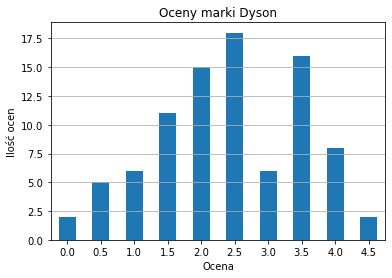

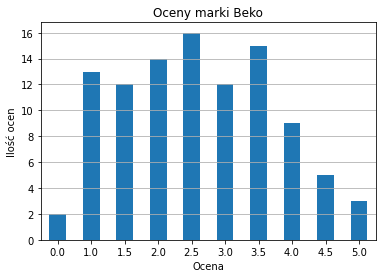

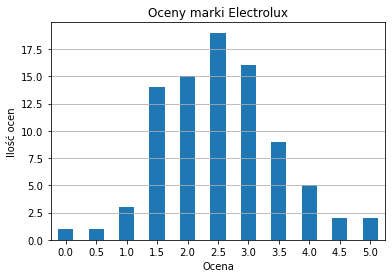

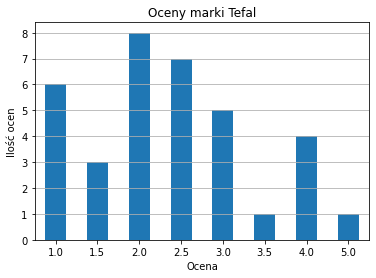

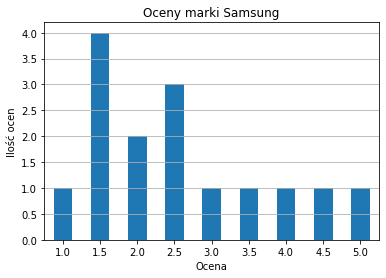

In [15]:
for marka in WARMIŃSKO_MAZURSKIE_NEW["Marka"].unique():
    temp = WARMIŃSKO_MAZURSKIE_NEW.loc[WARMIŃSKO_MAZURSKIE_NEW["Marka"] == marka]
    temp.groupby("Ocena").Ocena.count().plot.bar()
    plt.title("Oceny marki {}".format(marka))
    plt.grid(axis='y')
    plt.xticks(rotation=0)
    plt.ylabel("Ilość ocen")
    plt.show()

## Płeć kupujących

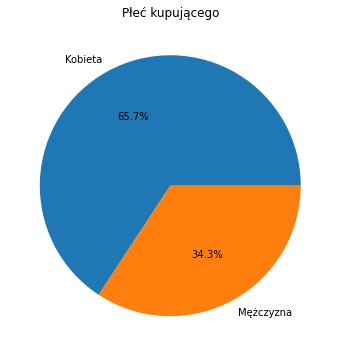

In [16]:
WARMIŃSKO_MAZURSKIE_NEW.groupby("Płeć kupującego").Ocena.count().plot.pie(labels=["Kobieta", "Mężczyzna"], autopct='%1.1f%%', figsize=(6, 6))
plt.title("Płeć kupującego")
plt.ylabel("")
plt.show()

## Średnie oceny marek ze względu na płeć

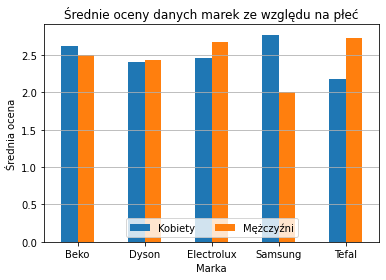

In [18]:
WARMIŃSKO_MAZURSKIE_NEW.groupby(["Marka", "Płeć kupującego"]).Ocena.mean().unstack().plot.bar()
plt.title("Średnie oceny danych marek ze względu na płeć")
plt.legend(["Kobiety", "Mężczyźni"], ncol=2, loc=8)
plt.xticks(rotation=0)
plt.ylabel("Średnia ocena")
plt.grid(axis='y')
plt.show()

## Wiek kupujących

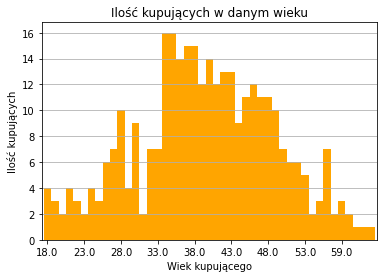

In [20]:
WARMIŃSKO_MAZURSKIE_NEW.groupby(["Wiek kupującego"]).Ocena.count().plot.bar(color="orange", width=1)
plt.locator_params(nbins=9)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.title("Ilość kupujących w danym wieku")
plt.ylabel("Ilość kupujących")
plt.show()

## Czas pomiędzy zakupem a wystawieniem oceny

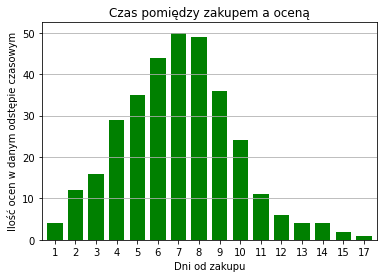

In [21]:
WARMIŃSKO_MAZURSKIE_NEW.groupby(["Dni od zakupu"]).Ocena.count().plot.bar(color="green", width=0.75)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.title("Czas pomiędzy zakupem a oceną")
plt.ylabel("Ilość ocen w danym odstępie czasowym")
plt.show()